In [1]:
import random as rnd
from collections import Counter
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


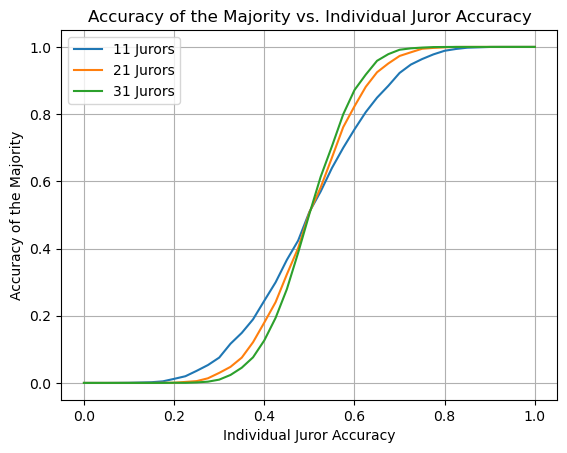

In [2]:
# determines the majority accuracy of a jury with a given number of jurors and a given individual accuracy for 
# each juror for 10,000 random trials
def jury_trial(jury_number, individual_accuracy):

    # create n jurors with same verdict accuracy in range from 0.00 to 1.00

    jury = [individual_accuracy for _ in range(jury_number)]

    # create 10,000 trials

    trials = 10000
    outcomes = [rnd.choice([0, 1]) for _ in range(trials)]

    verdicts = []
    # for each trial/outcome, every juror makes a decision
    for out in outcomes:
        verdict = []  # track the individual decisions of each juror
        for juror in jury:
            if rnd.random() < juror: # accurate
                verdict.append(out)
            else:
                verdict.append(1-out)
        verdicts.append(Counter(verdict).most_common(1)[0][0])

    # compute the jury majority verdict accuracy
    correct = 0
    for i in range(len(outcomes)):
        if outcomes[i] == verdicts[i]:
            correct += 1

    return correct / len(outcomes)

# plot curve
def plot_curve(accuracies, increments, num_jurors):
    plt.plot(increments, accuracies, label=f"{num_jurors} Jurors")

# create list of x increments from 0.0-1.0 to represent individual accuracies
def create_increments(x):
    n = 1 / (x - 1)
    result = [i * n for i in range(x)]
    return result

increments = create_increments(41)

jury_numbers = [11, 21, 31]

# run jury trial simulation for each increment for each juror and plot curve
for jury in jury_numbers:
    accuracies = []
    for increment in increments:
        accuracies.append(jury_trial(jury, increment))
    plot_curve(accuracies, increments, jury)

plt.xlabel("Individual Juror Accuracy")
plt.ylabel("Accuracy of the Majority")
plt.title("Accuracy of the Majority vs. Individual Juror Accuracy")
plt.legend()
plt.grid(True)